In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df= pd.read_csv("C:/Users/Paa Kwasi/Downloads/ift.csv")

# Dropping the null values and checking the dataypes 

In [3]:
df.dropna(inplace=True)
df.dtypes

Temperature    float64
Pressure       float64
Methane        float64
Nitrogen       float64
M1_conc        float64
M2_conc        float64
Salttype        object
D_change       float64
Phase           object
IFT            float64
dtype: object

##  Looking at the statistics

In [4]:
import seaborn as sns

In [5]:
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,75.275965,16.492740,3.735990,6.741936,0.739823,0.590028,0.653853,40.711513
std,39.820374,13.050292,14.502853,18.480021,1.263320,1.278646,0.296067,11.978374
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.182500,0.000000,0.000000,0.000000,0.000000,0.388625,31.150000
50%,70.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.731555,38.175000
75%,100.000000,20.965000,0.000000,0.000000,0.980000,0.045000,0.906625,48.645000
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

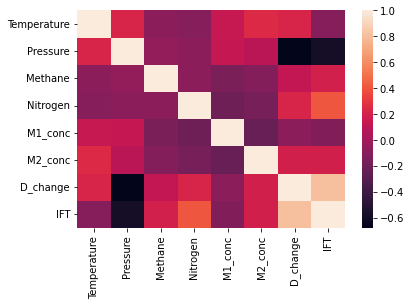

In [6]:
sns.heatmap(df.corr())

In [7]:
df.columns

Index(['Temperature', 'Pressure', 'Methane', 'Nitrogen', 'M1_conc', 'M2_conc',
       'Salttype', 'D_change', 'Phase', 'IFT'],
      dtype='object')

# Separating the x and y variables and splitting train and test 

In [8]:
X= df. drop(['Salttype','Phase','IFT'],axis=1).astype(float)

In [9]:
y=df.IFT.astype(float)

## Looking at the test and train shape on their axis and looking at random state

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=5)

In [11]:
X_train.shape, y_train.shape

((1124, 7), (1124,))

## Normalization  

In [12]:
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Looking at Linear regression

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
lr.score(X_train,y_train)

0.799243035839957

In [15]:
lr.score(X_test,y_test)

0.8357711207008521

# Writing a random_state hypothesis 

In [16]:
random_state= np.arange(50)
test_score=[]
train_score=[]
train_mse=[]
test_mse=[]
for i in random_state:
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=i)
    scaler= MinMaxScaler()
    X_train= scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    test_score.append(lr.score(X_test,y_test))
    train_score.append(lr.score(X_train,y_train))
    test_mse.append(mean_squared_error(y_test,lr.predict(X_test)))
    train_mse.append(mean_squared_error(y_train,lr.predict(X_train)))

In [17]:
test=np.array(test_score)
train=np.array(train_score)
tr_mse=np.array(train_mse)
te_mse=np.array(test_mse)

In [18]:
np.argmin(te_mse),np.min(te_mse),np.mean(te_mse)

(5, 23.96714632113172, 27.632070842039344)

In [19]:
np.max(test), np.argmax(test), np.mean(test) #test score statistics

(0.8357711207008521, 5, 0.8075987056177942)

In [20]:
np.max(train), np.min(train),np.argmax(train), np.mean(train)

(0.8229072126717089, 0.799243035839957, 27, 0.8108173571437607)

# SVM 

In [21]:
random_state= np.arange(50)
test_score=[]
train_score=[]
train_mse=[]
test_mse=[]
for i in random_state:
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=i)
    scaler= MinMaxScaler()
    X_train= scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error
    lr=SVR()
    lr.fit(X_train,y_train)
    test_score.append(lr.score(X_test,y_test))
    train_score.append(lr.score(X_train,y_train))
    test_mse.append(mean_squared_error(y_test,lr.predict(X_test)))
    train_mse.append(mean_squared_error(y_train,lr.predict(X_train)))

In [22]:
test=np.array(test_score)
train=np.array(train_score)
tr_mse=np.array(train_mse)
te_mse=np.array(test_mse)

In [23]:
np.max(test),np.mean(test),np.argmax(test)

(0.8661455146735482, 0.8446681560426654, 5)

In [24]:
np.max(train),np.mean(train),np.argmax(train)

(0.8612843232464709, 0.8515444609654588, 8)

## Using Random state 5 which two models agree is the best combination of data to test for Xgboost 

In [25]:
X_gtrain,X_gtest,y_gtrain,y_gtest=train_test_split(X,y,random_state=5, train_size=0.7)

In [26]:
X_gtrain=scaler.fit_transform(X_gtrain)
X_gtest=scaler.transform(X_gtest)

In [27]:
xgbr=XGBRegressor(learning_rate=0.301, reg_lambda=1,max_depth=6) # kept the hyperparameters standard.

In [28]:
xgbr.fit(X_gtrain,y_gtrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.301, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
xgbr.score(X_gtrain,y_gtrain) #clear overfit of data

0.9993310555437609

In [30]:
xgbr.score(X_gtest,y_gtest) # clear overfit of data but good results

0.9853289414406217

### Checking Mean squared error for the eXtreme Gradient Boosting xgboost

In [31]:
x_t=xgbr.predict(X_gtest)

In [32]:
mean_squared_error(y_gtest,x_t) # cost of test data

2.1410570947026963

In [33]:
mean_squared_error(y_gtrain,xgbr.predict(X_gtrain))# cost of train data

0.09519090068362979

In [34]:
X_gtest.shape, y_test.shape

((482, 7), (482,))

# Testing the IFT using unseen data to test effectiveness 

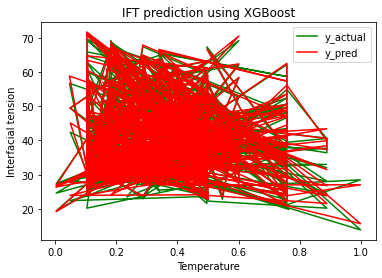

In [35]:
plt.figure()
plt.plot(X_gtest[:,0],y_gtest,'green', label='y_actual')
plt.plot(X_gtest[:,0],x_t,'red', label='y_pred')
plt.legend(loc=1)
plt.xlabel("Temperature")
plt.ylabel("Interfacial tension")
plt.title("IFT prediction using XGBoost")
plt.show()

# Using a Neural Network to test Interfacial tension 

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [240]:
model=Sequential([
    Dense(100,'relu',kernel_regularizer=l2(0.01)),
    Dense(200,'relu', kernel_regularizer=l2(0.01)),
    Dense(300,'relu', kernel_regularizer=l2(0.1)),
    Dense(400,'relu'),
    Dense(1,'linear')
])

In [241]:
model.compile(optimizer=Adam(0.01),loss='mse', metrics=['mse'])

# splitting the data

In [242]:
X_nntrain,X_nntest,y_nntrain,y_nntest=train_test_split(X,y,random_state=5, train_size=0.7)
X_ntrain=scaler.fit_transform(X_nntrain)
X_ntest=scaler.transform(X_nntest)
        
    

In [243]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('loss')<1.4:
            self.model.stop_training=True

In [244]:
history=model.fit(X_ntrain,y_nntrain,epochs=1000, callbacks=Mycallback())

Epoch 1/1000
36/36 [==============================] - 1s 4ms/step - loss: 487.5080 - mse: 474.4061
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 38.8716 - mse: 28.9979
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 30.8949 - mse: 22.2673
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 25.9614 - mse: 18.2480
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 25.7906 - mse: 18.8277
Epoch 6/1000
36/36 [==============================] - 0s 4ms/step - loss: 20.5036 - mse: 14.1234
Epoch 7/1000
36/36 [==============================] - 0s 4ms/step - loss: 20.8327 - mse: 15.0076
Epoch 8/1000
36/36 [==============================] - 0s 4ms/step - loss: 17.9898 - mse: 12.7044
Epoch 9/1000
36/36 [==============================] - 0s 4ms/step - loss: 15.3050 - mse: 10.4637
Epoch 10/1000
36/36 [==============================] - 0s 4ms/step - loss: 16.4001 - mse: 12.0137
Epoch 11/1000
36/36 [======

36/36 [==============================] - 0s 4ms/step - loss: 5.2712 - mse: 4.3292
Epoch 170/1000
36/36 [==============================] - 0s 5ms/step - loss: 5.4975 - mse: 4.5113
Epoch 171/1000
36/36 [==============================] - 0s 4ms/step - loss: 6.1186 - mse: 5.1396
Epoch 172/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.1016 - mse: 4.1385
Epoch 173/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.7981 - mse: 3.8365
Epoch 174/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.0202 - mse: 4.0603
Epoch 175/1000
36/36 [==============================] - 0s 4ms/step - loss: 6.0170 - mse: 5.0705
Epoch 176/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.8949 - mse: 4.9586
Epoch 177/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.7552 - mse: 3.8065
Epoch 178/1000
36/36 [==============================] - 0s 4ms/step - loss: 7.0418 - mse: 6.1077
Epoch 179/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 4.4848 - mse: 3.5787
Epoch 338/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.1684 - mse: 3.2641
Epoch 339/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.0980 - mse: 3.1908
Epoch 340/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.4945 - mse: 3.5843
Epoch 341/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.1848 - mse: 3.2828
Epoch 342/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.4224 - mse: 3.5150
Epoch 343/1000
36/36 [==============================] - 0s 4ms/step - loss: 8.8296 - mse: 7.9328
Epoch 344/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.1663 - mse: 4.2556
Epoch 345/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.9741 - mse: 3.0553
Epoch 346/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.2818 - mse: 3.3661
Epoch 347/1000
36/36 [=======================

36/36 [==============================] - 0s 5ms/step - loss: 4.4993 - mse: 3.6334
Epoch 506/1000
36/36 [==============================] - 0s 5ms/step - loss: 4.9975 - mse: 4.1272
Epoch 507/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.8574 - mse: 2.9813
Epoch 508/1000
36/36 [==============================] - 0s 5ms/step - loss: 3.9315 - mse: 3.0504
Epoch 509/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.2761 - mse: 3.4024
Epoch 510/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.5026 - mse: 2.6363
Epoch 511/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.4495 - mse: 2.5805
Epoch 512/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.4088 - mse: 2.5405
Epoch 513/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.0740 - mse: 4.1998
Epoch 514/1000
36/36 [==============================] - 0s 5ms/step - loss: 5.5547 - mse: 4.6820
Epoch 515/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 3.9436 - mse: 3.1013
Epoch 674/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.7902 - mse: 2.9461
Epoch 675/1000
36/36 [==============================] - 0s 5ms/step - loss: 3.6631 - mse: 2.8190
Epoch 676/1000
36/36 [==============================] - 0s 5ms/step - loss: 5.0270 - mse: 4.1931
Epoch 677/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.6590 - mse: 2.8170
Epoch 678/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.3425 - mse: 3.5005
Epoch 679/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.3060 - mse: 3.4645
Epoch 680/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.3007 - mse: 4.4649
Epoch 681/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.1204 - mse: 4.2850
Epoch 682/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.8385 - mse: 2.9969
Epoch 683/1000
36/36 [=======================

36/36 [==============================] - 0s 4ms/step - loss: 3.8882 - mse: 3.0427
Epoch 842/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.6040 - mse: 2.7622
Epoch 843/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.6298 - mse: 3.7958
Epoch 844/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.7858 - mse: 2.9515
Epoch 845/1000
36/36 [==============================] - 0s 4ms/step - loss: 4.0102 - mse: 3.1787
Epoch 846/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.8838 - mse: 3.0509
Epoch 847/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.9253 - mse: 3.0889
Epoch 848/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.2090 - mse: 4.3684
Epoch 849/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.9418 - mse: 3.1010
Epoch 850/1000
36/36 [==============================] - 0s 4ms/step - loss: 3.7761 - mse: 2.9376
Epoch 851/1000
36/36 [=======================

In [237]:
pd.DataFrame(history.history)

,loss,mse
0,637.344910,634.352356
1,53.827553,51.297703
2,26.452240,24.154119
3,22.314003,20.121279
4,19.141497,16.993647
...,...,...
995,4.399099,3.579275
996,3.920952,3.101901
997,3.614580,2.803417
998,3.430263,2.622366


In [245]:
from sklearn.metrics import r2_score
r2_score(y_nntest,model.predict(X_ntest)) #test

16/16 [==============================] - 0s 2ms/step


0.9809056781734835

In [246]:
r2_score(y_nntrain,model.predict(X_ntrain))

36/36 [==============================] - 0s 3ms/step


0.9833389972328225

In [247]:
model.save("Interfacial_tension_model.h5")

16/16 [==============================] - 0s 3ms/step


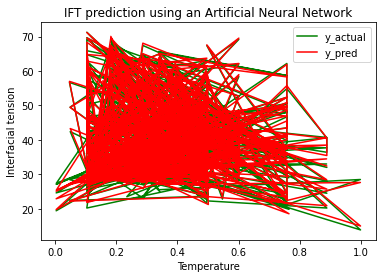

In [249]:
plt.figure()
plt.plot(X_ntest[:,0],y_nntest,'green', label='y_actual')
plt.plot(X_ntest[:,0],model.predict(X_ntest),'red', label='y_pred')
plt.legend(loc=1)
plt.xlabel("Temperature")
plt.ylabel("Interfacial tension")
plt.title("IFT prediction using an Artificial Neural Network")
plt.show()